# Importovanie knižníc a príprava súborov údajov na ďalšie použitie

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

data1 = pd.read_excel('../data/1vlna.xlsx')
data2 = pd.read_excel('../data/2vlna.xlsx')
data3 = pd.read_excel('../data/3vlna.xlsx')
data4 = pd.read_excel('../data/4vlna.xlsx')

columns = [
    'Vek',
    'Pohlavie',
    'Fajčenie',
    'Alkohol',
    'Hypertenzia',
    'Diabetes mellitus',
    'Kardiovaskulárne ochorenia',
    'Chronické respiračné ochorenia',
    'Renálne ochorenia',
    'Pečeňové ochorenia',
    'Onkologické ochorenia',
    'Imunosupresia',
    'Závažnosť priebehu ochorenia'
]


# Základné štatistiky pre každú vlnu pandémie

In [6]:
df1 = data1[columns]

print("=== 1. vlna ===")
print("\n--- Info ---")
df1.info()

print("\n--- Describe ---")
print(df1.describe(include='all'))


=== 1. vlna ===

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Vek                             1124 non-null   int64 
 1   Pohlavie                        1124 non-null   object
 2   Fajčenie                        1124 non-null   bool  
 3   Alkohol                         1124 non-null   bool  
 4   Hypertenzia                     1124 non-null   bool  
 5   Diabetes mellitus               1124 non-null   bool  
 6   Kardiovaskulárne ochorenia      1124 non-null   bool  
 7   Chronické respiračné ochorenia  1124 non-null   bool  
 8   Renálne ochorenia               1124 non-null   bool  
 9   Pečeňové ochorenia              1124 non-null   bool  
 10  Onkologické ochorenia           1124 non-null   bool  
 11  Imunosupresia                   1124 non-null   bool  
 12  Závažnosť priebehu

In [7]:
df2 = data2[columns]

print("=== 2. vlna ===")
print("\n--- Info ---")
df2.info()

print("\n--- Describe ---")
print(df2.describe(include='all'))


=== 2. vlna ===

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Vek                             824 non-null    int64 
 1   Pohlavie                        824 non-null    object
 2   Fajčenie                        824 non-null    bool  
 3   Alkohol                         824 non-null    bool  
 4   Hypertenzia                     824 non-null    bool  
 5   Diabetes mellitus               824 non-null    bool  
 6   Kardiovaskulárne ochorenia      824 non-null    bool  
 7   Chronické respiračné ochorenia  824 non-null    bool  
 8   Renálne ochorenia               824 non-null    bool  
 9   Pečeňové ochorenia              824 non-null    bool  
 10  Onkologické ochorenia           824 non-null    bool  
 11  Imunosupresia                   824 non-null    bool  
 12  Závažnosť priebehu o

In [8]:
df3 = data3[columns]

print("=== 3. vlna ===")
print("\n--- Info ---")
df3.info()

print("\n--- Describe ---")
print(df3.describe(include='all'))


=== 3. vlna ===

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Vek                             649 non-null    int64 
 1   Pohlavie                        649 non-null    object
 2   Fajčenie                        649 non-null    bool  
 3   Alkohol                         649 non-null    bool  
 4   Hypertenzia                     649 non-null    bool  
 5   Diabetes mellitus               649 non-null    bool  
 6   Kardiovaskulárne ochorenia      649 non-null    bool  
 7   Chronické respiračné ochorenia  649 non-null    bool  
 8   Renálne ochorenia               649 non-null    bool  
 9   Pečeňové ochorenia              649 non-null    bool  
 10  Onkologické ochorenia           649 non-null    bool  
 11  Imunosupresia                   649 non-null    bool  
 12  Závažnosť priebehu o

In [9]:
df4 = data4[columns]

print("=== 4. vlna ===")
print("\n--- Info ---")
df4.info()

print("\n--- Describe ---")
print(df4.describe(include='all'))


=== 4. vlna ===

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Vek                             1251 non-null   int64  
 1   Pohlavie                        1251 non-null   object 
 2   Fajčenie                        1251 non-null   bool   
 3   Alkohol                         1251 non-null   bool   
 4   Hypertenzia                     1251 non-null   bool   
 5   Diabetes mellitus               1251 non-null   bool   
 6   Kardiovaskulárne ochorenia      1251 non-null   bool   
 7   Chronické respiračné ochorenia  1251 non-null   bool   
 8   Renálne ochorenia               1251 non-null   bool   
 9   Pečeňové ochorenia              1251 non-null   bool   
 10  Onkologické ochorenia           1251 non-null   bool   
 11  Imunosupresia                   1251 non-null   bool   
 12  Záva

# Vizualizácia rozdelenia kategórií závažnosti priebehu ochorenia pre každú vlnu pandémie.
Pomáha porovnať počet pacientov podľa závažnosti v jednotlivých obdobiach.

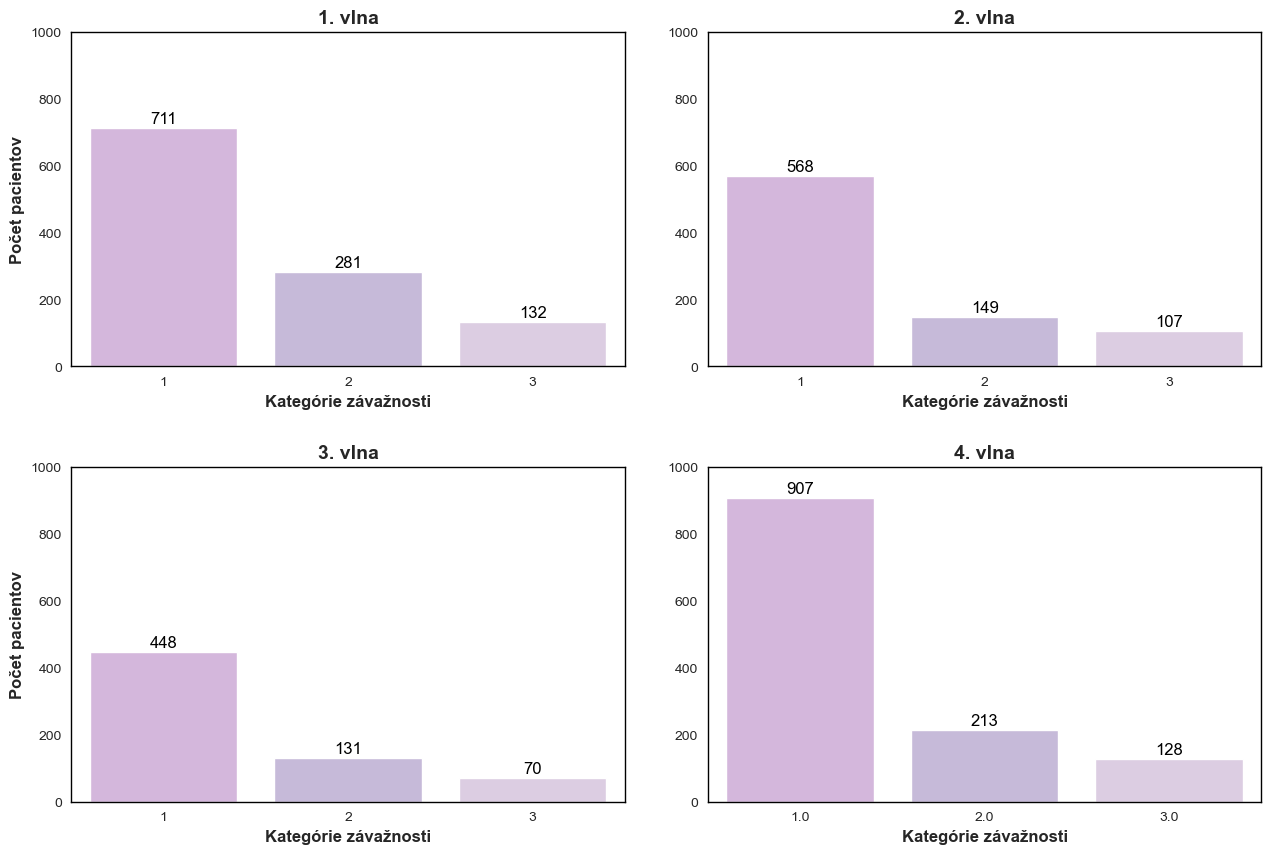

In [47]:
datasets = [data1, data2, data3, data4]
titles = ["1. vlna", "2. vlna", "3. vlna", "4. vlna"]
custom_palette = ["#d7b1e2", "#c5b5de", "#decae5"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

#Prechod cez všetky vlny a vytvorenie samostatného grafu pre každú
for i, (data, title) in enumerate(zip(datasets, titles)):
    row, col = divmod(i, 2)
    ax = sns.countplot(x=data["Závažnosť priebehu ochorenia"], ax=axes[row, col],
                        hue=data["Závažnosť priebehu ochorenia"], palette=custom_palette, legend=False)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                    ha='center', va='bottom', fontsize=12, color='black')

# Nastavenie titulku a popisov osí
    axes[row, col].set_title(title, fontsize=14,fontweight='bold')
    axes[row, col].set_xlabel("Kategórie závažnosti", fontsize=12,fontweight='bold')
    axes[row, col].set_ylabel("Počet pacientov", fontsize=12,fontweight='bold')
    axes[row, col].tick_params(axis='both', labelsize=10)

    axes[row, col].set_ylim(0, 1000)
    axes[row, col].set_yticks(range(0, 1100, 200))
    axes[row, col].yaxis.set_tick_params(labelleft=True)
    axes[row, col].set_facecolor('white')
    fig.patch.set_facecolor('white')

    for spine in axes[row, col].spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)
    axes[row, col].grid(False)

# Prispôsobenie rozloženia a uloženie obrázku
plt.subplots_adjust(wspace=0.15, hspace=0.3, right=0.95, left=0.1)
plt.savefig("Rozdelenie_tried.png", dpi=300, bbox_inches="tight")
plt.show()


# Distribúcia veku pacientov

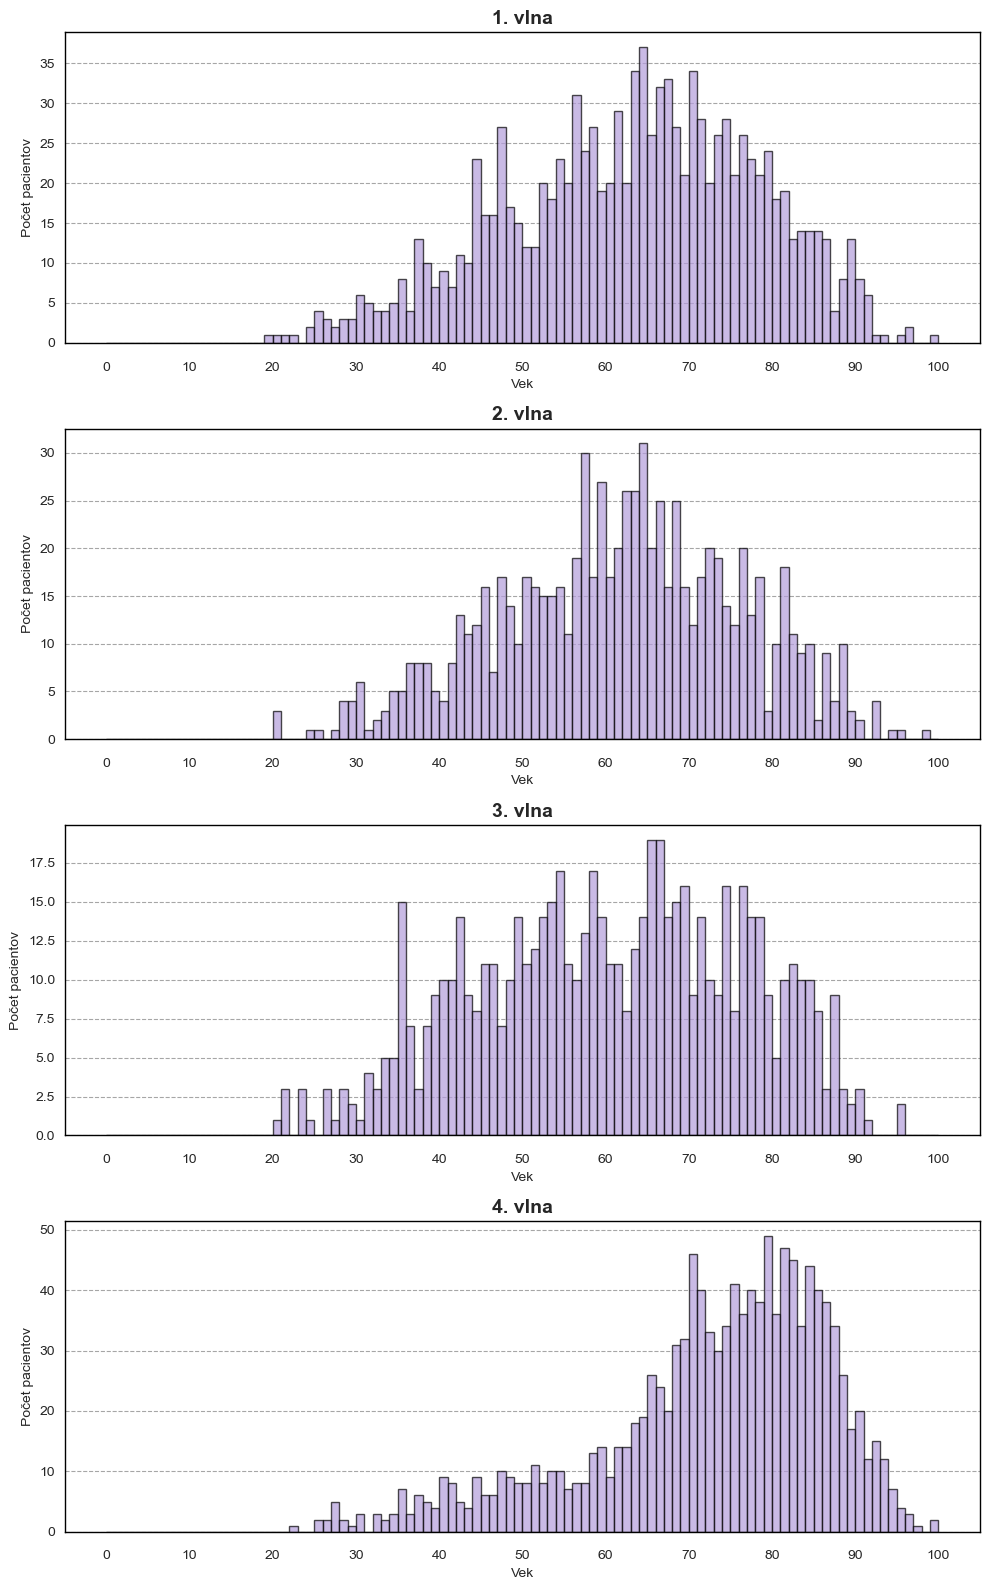

In [62]:

datasets = [data1, data2, data3, data4]
titles = ["1. vlna", "2. vlna", "3. vlna", "4. vlna"]

# Definovanie intervalov pre histogram: 0 až 100 rokov po 1 roku
bins = list(range(0, 101, 1))

# Vytvorenie 4 riadkov (pre každú vlnu)
fig, axes = plt.subplots(4, 1, figsize=(10, 16))

#Kreslenie histogramu pre každú vlnu zvlášť
for i, data in enumerate(datasets):
    vek = data["Vek"].dropna()
    axes[i].hist(vek, bins=bins, edgecolor="black",color="#B39DDB", alpha=0.7)
    axes[i].set_xticks(range(0, 101, 10))
    axes[i].set_xlabel("Vek")
    axes[i].set_ylabel("Počet pacientov")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7, color='gray')
    axes[i].tick_params(axis='x', which='both', length=10, color='black')
    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')

    axes[i].set_facecolor('white')
    for spine in axes[i].spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)



plt.tight_layout()
plt.savefig("Distribúcia_veku.png", dpi=300, bbox_inches='tight')
plt.show()


# Rozdelenie veku podľa kategórie závažnosti priebehu ochorenia

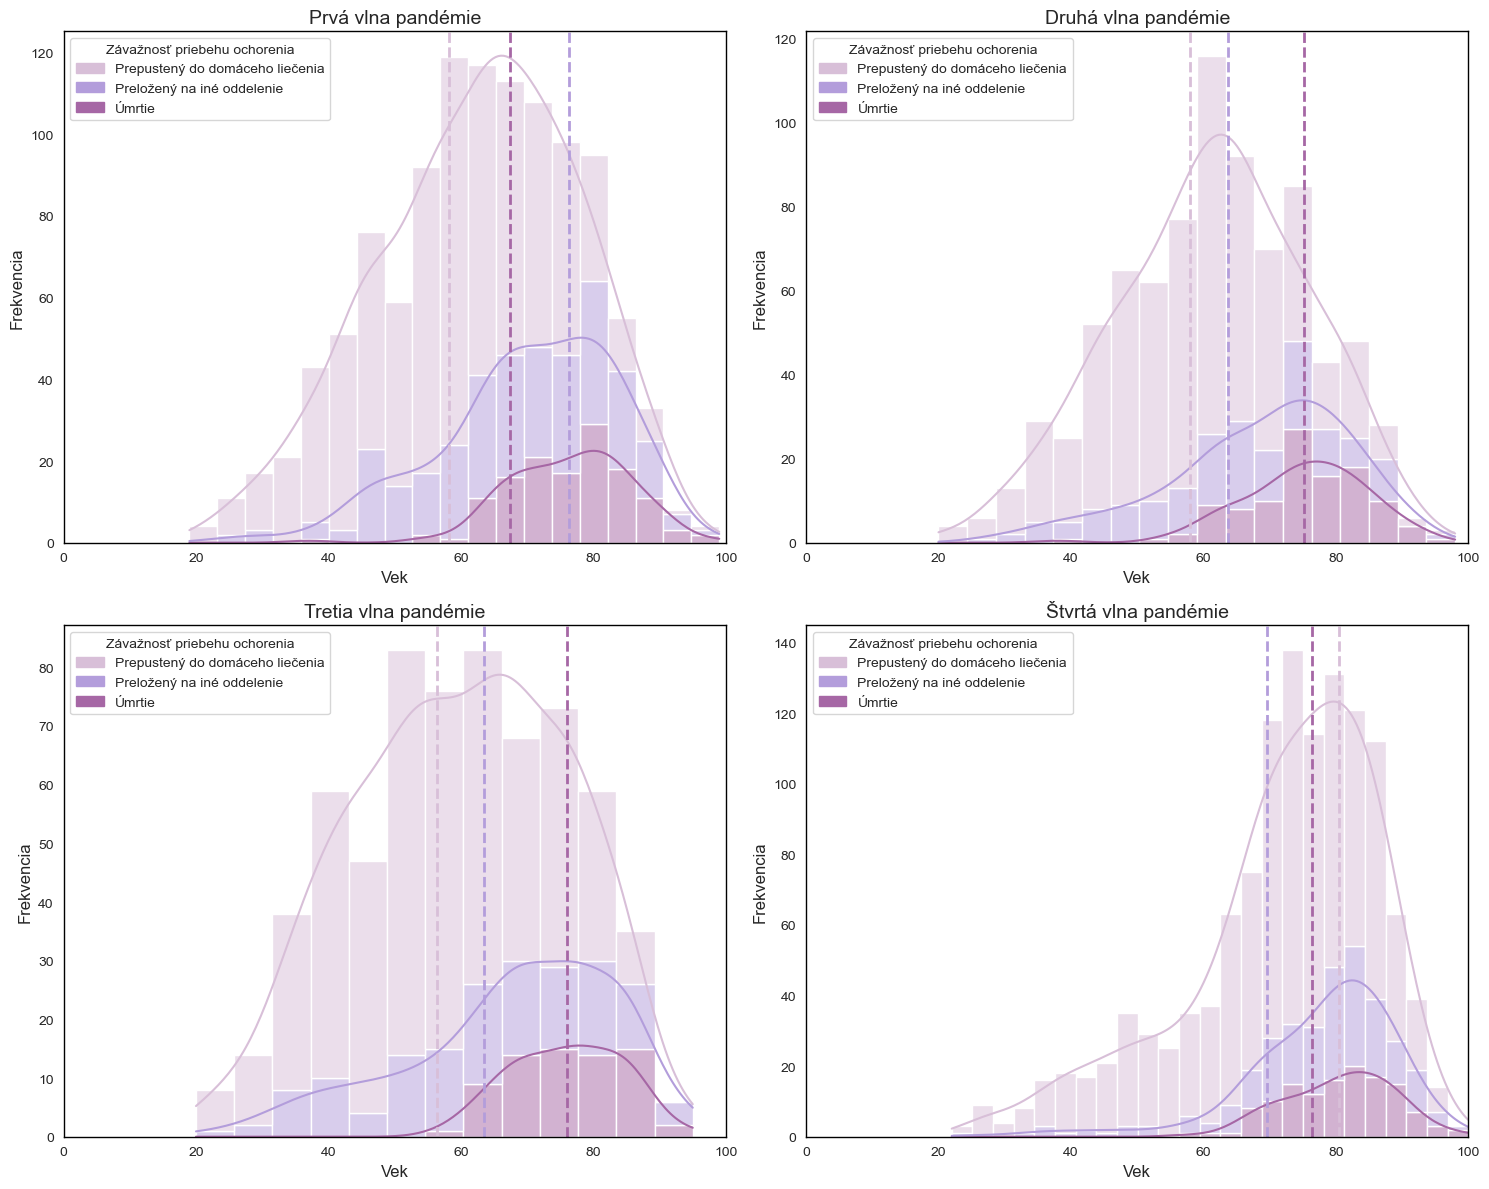

In [66]:
datasets = [data1, data2, data3, data4]
titles_sk = ['Prvá vlna pandémie', 'Druhá vlna pandémie', 'Tretia vlna pandémie', 'Štvrtá vlna pandémie']
output_path = 'Rozdelenie_veku_podľa_kategórie_závažnosti.png'

# Vytvorenie plochy pre 4 podgrafy (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()


colors = ['#D8BFD8', '#B39DDB', '#a667a5']
color_explanation = {
    '#D8BFD8': 'Prepustený do domáceho liečenia',
    '#B39DDB': 'Preložený na iné oddelenie',
    '#a667a5': 'Úmrtie'
}

x_min = 0
x_max = 100

#Pre každý dataset (vlnu) sa vytvára jeden histogram
for i, df in enumerate(datasets):
    df = df.dropna(subset=['Závažnosť priebehu ochorenia'])

    sns.histplot(data=df, x='Vek', hue='Závažnosť priebehu ochorenia', multiple='stack', kde=True,
                 palette=sns.color_palette(colors[:df['Závažnosť priebehu ochorenia'].nunique()]), ax=axes[i])

    axes[i].set_title(f'{titles_sk[i]}', fontsize=14)
    axes[i].set_xlabel('Vek', fontsize=12)
    axes[i].set_ylabel('Frekvencia', fontsize=12)

 #Legenda podľa definovaných farieb a ich významu
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors[:df['Závažnosť priebehu ochorenia'].nunique()]]
    labels = [color_explanation.get(color, f"Neznáma farba: {color}") for color in colors[:df['Závažnosť priebehu ochorenia'].nunique()]]

    axes[i].legend(handles, labels, title='Závažnosť priebehu ochorenia', frameon=True, facecolor='white')
    axes[i].set_xlim(x_min, x_max)


#Pridanie zvislej čiary pre priemerný vek v každej kategórii závažnosti
    for severity in df['Závažnosť priebehu ochorenia'].unique():
        subset = df[df['Závažnosť priebehu ochorenia'] == severity]['Vek'].dropna()
        mean_age = subset.mean()
        severity_index = df['Závažnosť priebehu ochorenia'].unique().tolist().index(severity)
        axes[i].axvline(mean_age, color=colors[severity_index], linestyle='--', linewidth=2)
        axes[i].set_facecolor('white')
        axes[i].grid(False)
        for spine in axes[i].spines.values():
            spine.set_color('black')
            spine.set_linewidth(1)



plt.tight_layout()
plt.savefig(output_path)
plt.show()



# Сhi-kvadrát
 Vykonanie chi-kvadrát testov pre každú vlnu pandémie s cieľom zistiť vzťah medzi kategóriovými premennými a závažnosťou priebehu ochorenia. Výsledky sú zoradené a zobrazené v tabuľkovej forme

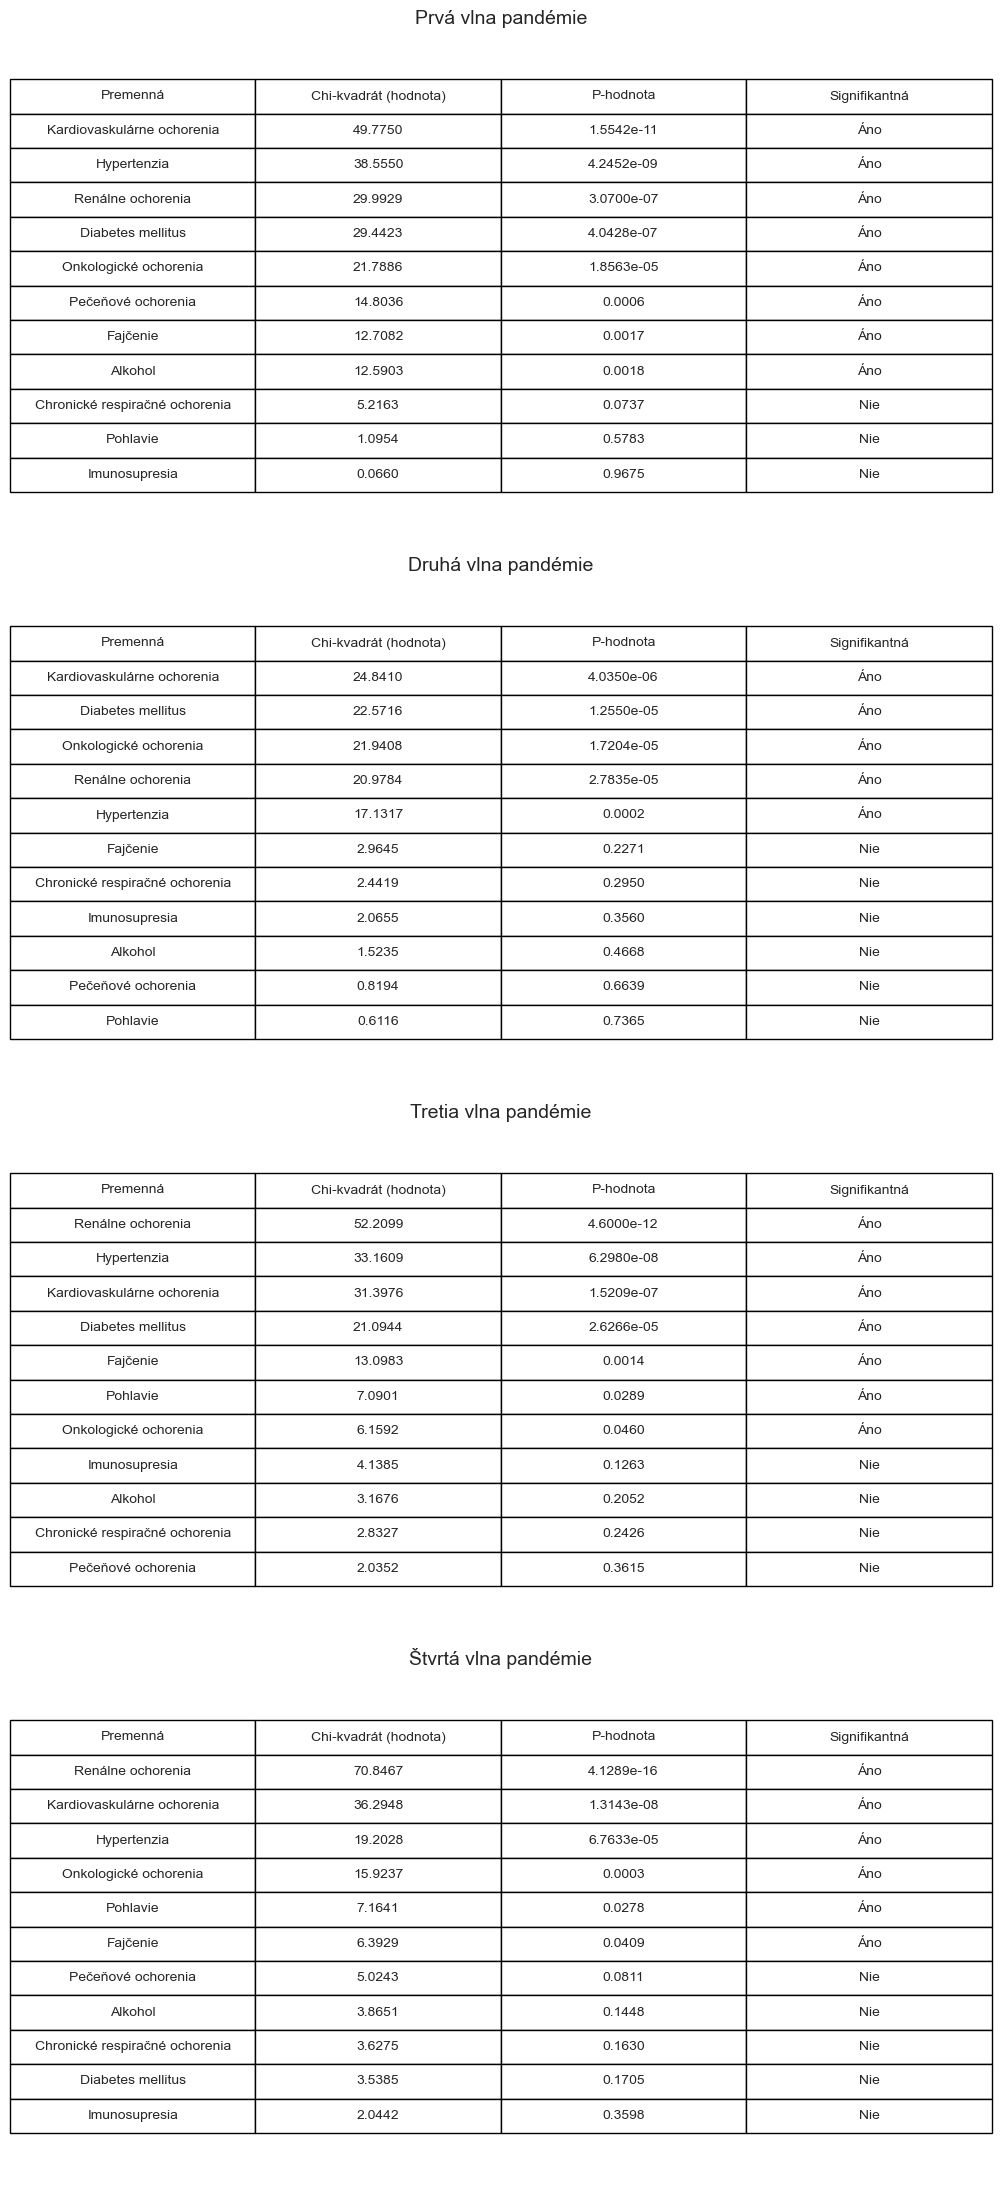

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


datasets = [data1, data2, data3, data4]
wave_names_sk = ['Prvá vlna pandémie', 'Druhá vlna pandémie', 'Tretia vlna pandémie', 'Štvrtá vlna pandémie']

# Cieľová premenná a zoznam nezávislých kategóriových premenných
target_column = 'Závažnosť priebehu ochorenia'
categorical_features = ['Pohlavie', 'Fajčenie', 'Alkohol', 'Hypertenzia',
                        'Diabetes mellitus', 'Kardiovaskulárne ochorenia',
                        'Chronické respiračné ochorenia', 'Renálne ochorenia',
                        'Pečeňové ochorenia', 'Onkologické ochorenia',
                        'Imunosupresia']


fig, axes = plt.subplots(4, 1, figsize=(10, 22))
axes = axes.flatten()


for i, df in enumerate(datasets):
    df = df.dropna(subset=[target_column] + categorical_features)
    results = []
   # Chi-kvadrát test pre každú premennú
    for feature in categorical_features:
        contingency = pd.crosstab(df[feature], df[target_column])
        chi2, p, _, _ = chi2_contingency(contingency)
        results.append({
            'Premenná': feature,
            'Chi-kvadrát (hodnota)': chi2,
            'P-hodnota': p,
            'Signifikantná': 'Áno' if p < 0.05 else 'Nie'
        })
# Výsledky zoradené podľa hodnoty chi-kvadrátu
    result_df = pd.DataFrame(results).sort_values(by='Chi-kvadrát (hodnota)', ascending=False)

# Formátovanie čísel
    result_df['Chi-kvadrát (hodnota)'] = result_df['Chi-kvadrát (hodnota)'].apply(lambda x: f"{x:.4f}")
    result_df['P-hodnota'] = result_df['P-hodnota'].apply(lambda x: f"{x:.4e}" if x < 0.0001 else f"{x:.4f}")


    ax = axes[i]
    ax.axis('off')
    ax.set_title(wave_names_sk[i], fontsize=14)
    table = ax.table(cellText=result_df.values,
                     colLabels=result_df.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.1, 1.5)


plt.tight_layout()
plt.savefig('chi2.png')
plt.show()

